1. [Altair Visualization](#Altair-visualization)
1. [Other visualisations of interest](#Other-visualisations-of-interest)

# Altair Visualization
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

In [18]:
# Import Libraries
import altair as alt
# import streamlit as st
import pandas as pd
# import matplotlib
from matplotlib import pyplot as plt
import matplotlib
matplotlib.use('Agg')
# import seaborn
import seaborn as sns

/home/isabel/anaconda3/envs/ml_for_algo_trading/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  


## Tailor series Data frames

### Simple Moving Average

In [3]:
# read csv
sma = pd.read_csv('../reports/sma_strategy.csv')

# rename first column as date
sma = sma.rename(columns={'Unnamed: 0':'date'})

# monthly resample
sma.date = pd.to_datetime(sma.date)
sma = sma.resample('M', on='date').mean().reset_index()

# rename columns of interest (stock prices and dual moving averages)
sma = sma.rename(columns={'price': '_price', 'moving_average': '_moving_average'})

# melt stock prices and dual moving averages into 'series' new variable
keys = [x for x in sma.columns if x.startswith('_')]
sma_series = pd.melt(sma, id_vars=['date', 'portfolio_value'], value_vars=keys, value_name='price', var_name='series')

In [5]:
sma_series.head()

,date,portfolio_value,series,price
0,2015-05-31,10001.626271,_moving_average,130.493375
1,2015-06-30,10300.577205,_moving_average,128.584205
2,2015-07-31,10491.731318,_moving_average,125.907301
3,2015-08-31,17306.990929,_moving_average,115.321565
4,2015-09-30,17663.889548,_moving_average,112.563988


### ML Buy and Hold

In [6]:
# read csv
gb = pd.read_csv('../reports/buy_and_hold_GB.csv')

# rename first column as date
gb = gb.rename(columns={'Unnamed: 0':'date'})

# monthly resample
gb.date = pd.to_datetime(gb.date)
gb = gb.resample('M', on='date').mean().reset_index()

# rename columns of interest (stock prices and dual moving averages)
gb = gb.rename(columns={'AAPL': 'price'})


## Altair Graphs

In [10]:
select_time = alt.selection(type="interval",encodings=["x"])

portfolio_sma = alt.Chart(sma_series).mark_line(strokeWidth=3, opacity=0.7).encode(
    x="date",
    y='portfolio_value'
).properties(
    width=300,
    height=200
).transform_filter(
    select_time
)

price_sma = alt.Chart(sma_series).mark_line(strokeWidth=2, opacity=0.7).encode(
    x="date",
    y='price',
    color='series',
).properties(
    width=300,
    height=200,
    selection=select_time
)

portfolio_gb = alt.Chart(gb).mark_line(strokeWidth=3, opacity=0.7).encode(
    x="date",
    y='portfolio_value'
).properties(
    width=300,
    height=200
).transform_filter(
    select_time
)

price_gb = alt.Chart(sma_series).mark_line(strokeWidth=3, opacity=0.7).encode(
    x="date",
    y='price'
).properties(
    width=300,
    height=200,
    selection=select_time
)

chart = (portfolio_sma&price_sma).properties(title='TA Strategy') | (portfolio_gb&price_gb).properties(title='ML Strategy')
chart
#chart.save('../images/viz/readme/strategies2.png')

alt.HConcatChart(...)

# Other visualisations of interest
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

## TA - ML shorts and longs

In [3]:
sma = pd.read_csv('../reports/sma_strategy.csv', parse_dates=True)
sma = sma.rename(columns={'Unnamed: 0':'date'}).set_index()
sma.date = pd.to_datetime(sma.date)

In [13]:
gbr = pd.read_csv('../reports/buy_and_hold_GB.csv', parse_dates=True)
gbr = gbr.rename(columns={'Unnamed: 0':'date'})
gbr.date = pd.to_datetime(gbr.date)

/home/isabel/anaconda3/envs/ml_for_algo_trading/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  


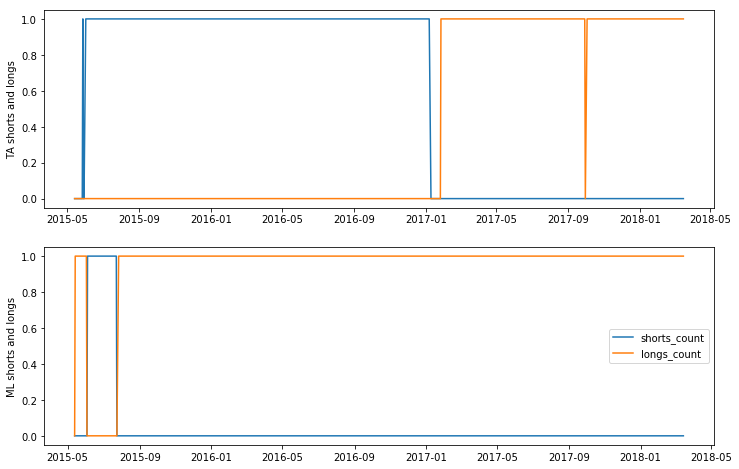

In [14]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(211)
ax1.plot(sma.date, sma.shorts_count)
ax1.plot(sma.date, sma.longs_count)
ax1.set_ylabel('TA shorts and longs')

ax2 = fig.add_subplot(212)
ax2.plot(gbr.date, gbr.shorts_count)
ax2.plot(gbr.date, gbr.longs_count)
ax2.set_ylabel('ML shorts and longs')
plt.legend(loc=0)
plt.show()

fig.savefig('../images/viz/readme/shorts_longs.png')

## Risk Exposure

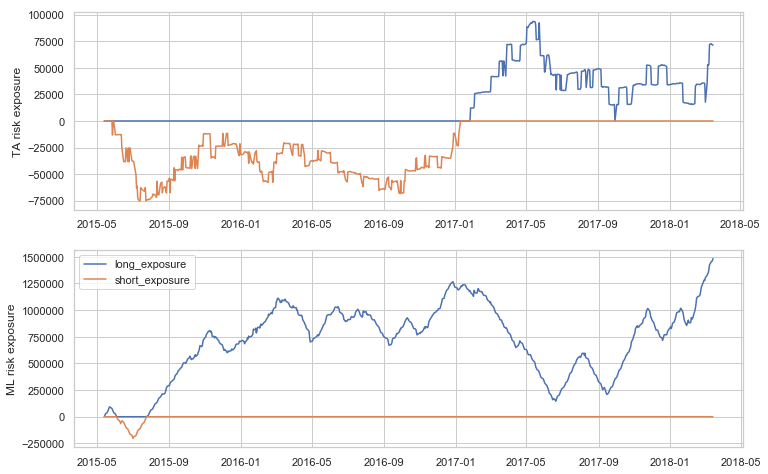

In [19]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(211)
ax1.plot(sma.date, sma.long_exposure)
ax1.plot(sma.date, sma.short_exposure)
ax1.set_ylabel('TA risk exposure')

ax2 = fig.add_subplot(212)
ax2.plot(gbr.date, gbr.long_exposure)
ax2.plot(gbr.date, gbr.short_exposure)
ax2.set_ylabel('ML risk exposure')
plt.legend(loc=0)
plt.show()

fig.savefig('../images/viz/readme/risk_exposure.png')

## Profit and Loss

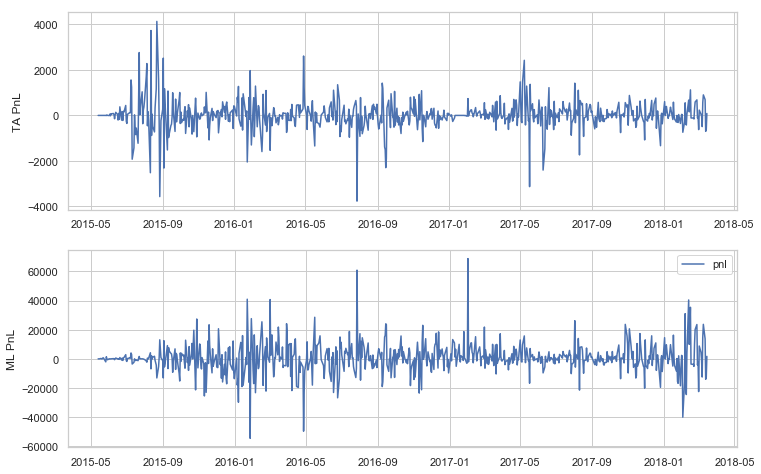

In [21]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(211)
ax1.plot(sma.date, sma.pnl)
ax1.set_ylabel('TA PnL')

ax2 = fig.add_subplot(212)
ax2.plot(gbr.date, gbr.pnl)
ax2.set_ylabel('ML PnL')
plt.legend(loc=0)
plt.show()

fig.savefig('../images/viz/readme/PnL.png')